<a href="https://colab.research.google.com/github/francoquintanilla0/Retos-1y2/blob/main/Reto_Codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")  

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Documentos IA/titanic'
!ls

/content/gdrive/MyDrive/Colab Notebooks/Documentos IA/titanic
gender_submission.csv  test.csv  train.csv


In [3]:
# TODAS LAS LIBRERIAS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Leemos el archivo
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Documentos IA/titanic/train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Sacamos el tamaño del archivo
df.shape

(891, 11)

In [6]:
# Contamos cuantos NaN existen en el dataset de cada grupo
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# Como hay demasiados datos faltantes de "Cabin", eliminamos esa columna
df = df.drop('Cabin', axis=1)

In [8]:
# En "Age" tenemos 2 opcines, borrar los datos NaNs o rellenarlos con la media de los datos que tenemos
# Opté por eliminarlos, ya que la edad si puede ser un factor importante al determinar si un pasajero
# sobrevive o no.

# En el caso de "Embarked" como solo son 2, igual eliminamos esas filas.
df = df.dropna()

In [9]:
# Volvemos a ver si quedan más NaNs en el data set.
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [10]:
# Vemos cual es el tamaño del data set limpio
df.shape

(712, 10)

In [11]:
# Vemos que perdimos un total de 179 datos
891 - 712

179

In [12]:
# Vemos el dataset limpio
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
# Buscamos datos duplicados en "Names", es decir nombres duplicados
listNames = df['Name'].tolist()

dup = {x for x in listNames if listNames.count(x) > 1}
print(dup)
# NO tenemos nombres duplicados, por lo que a pesar de que en una familia hubieran
# estado (ej. 5 personas), solo se reporto 1 (ya sea muerte o sobreviviente)

set()


In [14]:
# Hacemos un poco de reducción de dimensiones, por lo que podemos sumar los grupos de 
# "SibSp" y	"Parch" sacando un total de integrantes. El 1 se suma por si alguien va solo 
# (la persona que sale en "Name")

# Hacemos esto por que puede ser que el factor de ver por tu vida o por la de alguien de tu familia
# puede ser que afecte en el razonamiento de las personas
df['Tots in Group'] = df['SibSp'] + df['Parch'] + 1

# Con esta relación, entonces podemos eliminar las columnas de "SibSp" y	"Parch".
df = df.drop(['SibSp', 'Parch'], axis=1)

# Para limpiar más nuestros datos, eliminamos datos irrelevantes como
# "Ticket", "Fare" y el "Name".
df = df.drop(['Ticket', 'Fare', 'Name'], axis=1)

# Volvemos a ver nuestro data set actualizado
df.head()

,Survived,Pclass,Sex,Age,Embarked,Tots in Group
PassengerId,,,,,,
1,0,3,male,22.0,S,2
2,1,1,female,38.0,C,2
3,1,3,female,26.0,S,1
4,1,1,female,35.0,S,2
5,0,3,male,35.0,S,1


In [15]:
# Checamos el minimo y maximo valor de las edades
print(min(df['Age']))
print(max(df['Age']))

0.42
80.0


In [16]:
# Como tenemos un extenso rango de edades, los juntamos en un "Rango" de edades.
for i in df:
    df['Age Categ'] = pd.cut(df['Age'], bins=[0, 5, 12, 18, 35, 60, 81], \
                           labels=['Bebe', 'Niño', 'Adolecente', 'Adulto Joven', 'Adulto Mayor', 'Anciano'])

# Hecho esto, podemos eliminar la columan de las edades numericas
df = df.drop('Age', axis=1)

# Vemos los datos
df.head(10)

,Survived,Pclass,Sex,Embarked,Tots in Group,Age Categ
PassengerId,,,,,,
1,0,3,male,S,2,Adulto Joven
2,1,1,female,C,2,Adulto Mayor
3,1,3,female,S,1,Adulto Joven
4,1,1,female,S,2,Adulto Joven
5,0,3,male,S,1,Adulto Joven
7,0,1,male,S,1,Adulto Mayor
8,0,3,male,S,5,Bebe
9,1,3,female,S,3,Adulto Joven
10,1,2,female,C,2,Adolecente


Hasta Aqui LLevo 18/ago/2022. TRY 1

Seguir aqui abajo después...

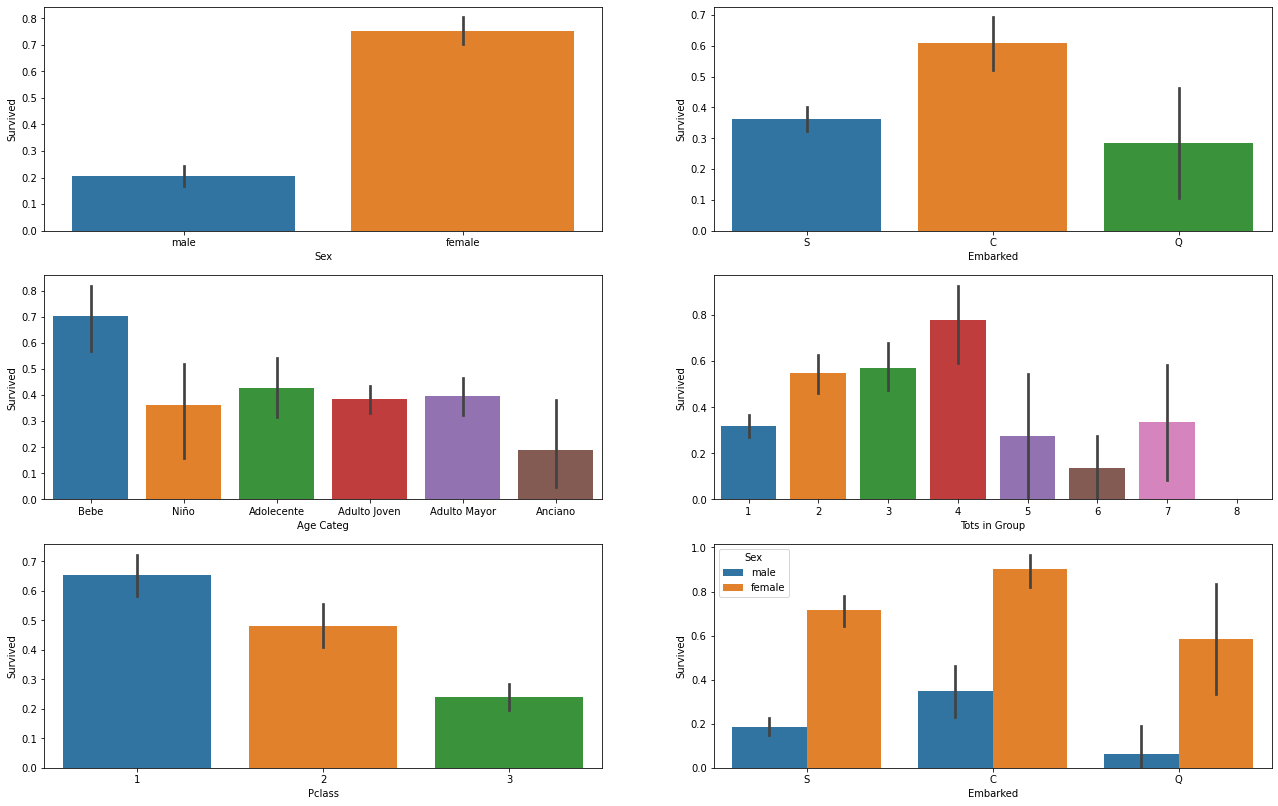

In [17]:
# Visualizaciones de proporciones de diferencias.
fig, axes = plt.subplots(3, 2, figsize=(22,14))

sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 0])
sns.barplot(x='Age Categ', y='Survived', data=df, ax=axes[1, 0])
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[2, 0])
sns.barplot(x='Embarked', y='Survived', data=df, ax=axes[0, 1])
sns.barplot(x='Tots in Group', y='Survived', data=df, ax=axes[1, 1])
sns.barplot(x='Embarked', y='Survived', data=df, ax=axes[2, 1], hue="Sex")

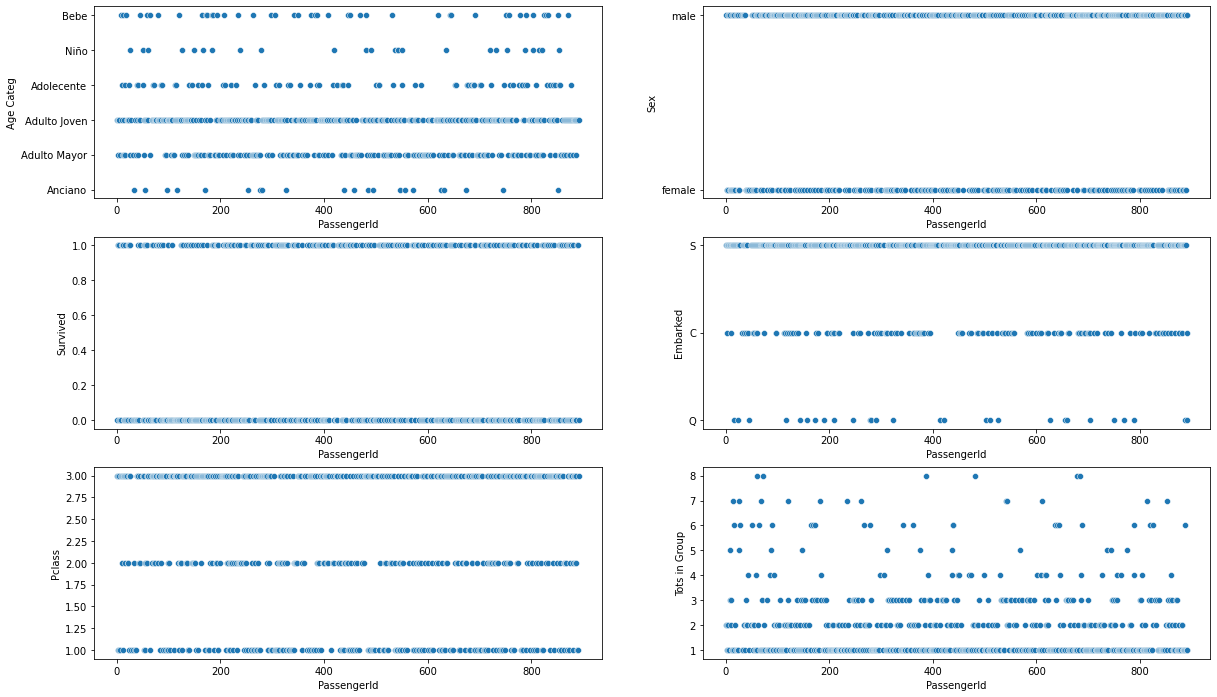

In [18]:
# Figuras con scatter para poder tener una mejor visualización de los datos, por si es que existe
# un outlier.
fig, axes = plt.subplots(3, 2, figsize=(20,12))
sns.scatterplot(x='PassengerId', y='Age Categ', data=df, ax=axes[0, 0])
sns.scatterplot(x='PassengerId', y='Survived', data=df, ax=axes[1, 0])
sns.scatterplot(x='PassengerId', y='Pclass', data=df, ax=axes[2, 0])
sns.scatterplot(x='PassengerId', y='Sex', data=df, ax=axes[0, 1])
sns.scatterplot(x='PassengerId', y='Embarked', data=df, ax=axes[1, 1])
sns.scatterplot(x='PassengerId', y='Tots in Group', data=df, ax=axes[2, 1])

In [19]:
# Vamos a sumar Tots in group para ver si son da el mismo resultado que el shape del dataset
# Para ver si las personas que vienen en familia tambien están registradas, o si solo se registro
# a un familiar principal.
df['Tots in Group'].sum()

# Como vimos tambien con los duplicados, hay más personas de las que están registradas
# y eso abre muchas más preguntas

1386

In [20]:
# Ahora, con los datos limpios y clasificados, necesitamos hacerlos numericos, por
# lo que la función de get_dummies de python nos va a ayudar a hacer más columnas
# numericas de TRUE-FALSE después generar el modelo.

df = pd.get_dummies(df, columns = ["Sex"], drop_first = False)
df = pd.get_dummies(df, columns = ["Age Categ"], drop_first = False)
df = pd.get_dummies(df, columns = ["Pclass"], drop_first = False)
df = pd.get_dummies(df, columns = ["Embarked"], drop_first = False)

# Vemos el nuevo dataframe
df.head()

,Survived,Tots in Group,Sex_female,Sex_male,Age Categ_Bebe,Age Categ_Niño,Age Categ_Adolecente,Age Categ_Adulto Joven,Age Categ_Adulto Mayor,Age Categ_Anciano,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
1,0,2,0,1,0,0,0,1,0,0,0,0,1,0,0,1
2,1,2,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1
4,1,2,1,0,0,0,0,1,0,0,1,0,0,0,0,1
5,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1


Ya tenemos todas las categorias en numeros. (TRY 2)

Ahora creo que empezamos a buscar que modelo se acomodaría mejor, pero creo que sería el de logistic regression por tener 1 y 0. 

Por lo que no se si borrar la categoria de "Tots in Group", pero creo que si después queremos separar nuestro modelo en clusters, ese aspecto de integrantes de la familia nos podría ayudar a dividirlo en K-means.


In [21]:
# Buscar logistic regression en python (sklearn)

Tenemos que importar el TEST data set, para usarlo en el modelo.

In [22]:
# Para el modelo, tenemos que traer los datos que va a predecir, es decir el test.
df_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Documentos IA/titanic/test.csv', index_col='PassengerId')
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
# Tenemos que volver a hacer toda la limpia y conjunto de datos que hicimos con el data de train

# Sacamos su tamaño
df_test.shape

(418, 10)

In [24]:
# Vemos cuantos NaNs tiene
df_test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [25]:
# Quitamos "Cabin" por 2 cosas, por que tiene demasiados NaNs y por que ya lo habiamos eliminado
# del train data.
df_test = df_test.drop('Cabin', axis=1)

# Tambien después quitamos todos los NaNs
df_test = df_test.dropna()

In [26]:
# Vemos si quedan NaNs en el dataset del test
df_test.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [27]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [28]:
# Hacemos la misma limpia que antes
df_test['Tots in Group'] = df_test['SibSp'] + df_test['Parch'] + 1

# Con esta relación, entonces podemos eliminar las columnas de "SibSp" y	"Parch".
df_test = df_test.drop(['SibSp', 'Parch'], axis=1)

# Para limpiar más nuestros datos, eliminamos datos irrelevantes como
# "Ticket", "Fare" y el "Name".
df_test = df_test.drop(['Ticket', 'Fare', 'Name'], axis=1)

# Volvemos a ver nuestro data set actualizado
df_test.head()

,Pclass,Sex,Age,Embarked,Tots in Group
PassengerId,,,,,
892,3,male,34.5,Q,1
893,3,female,47.0,S,2
894,2,male,62.0,Q,1
895,3,male,27.0,S,1
896,3,female,22.0,S,3


In [29]:
# Hacemos lo del "Rango" de edades.
for i in df_test:
    df_test['Age Categ'] = pd.cut(df_test['Age'], bins=[0, 5, 12, 18, 35, 60, 81], \
                           labels=['Bebe', 'Niño', 'Adolecente', 'Adulto Joven', 'Adulto Mayor', 'Anciano'])

# Hecho esto, podemos eliminar la columan de las edades numericas
df_test = df_test.drop('Age', axis=1)

# Vemos los datos
df_test.head(10)

,Pclass,Sex,Embarked,Tots in Group,Age Categ
PassengerId,,,,,
892,3,male,Q,1,Adulto Joven
893,3,female,S,2,Adulto Mayor
894,2,male,Q,1,Anciano
895,3,male,S,1,Adulto Joven
896,3,female,S,3,Adulto Joven
897,3,male,S,1,Adolecente
898,3,female,Q,1,Adulto Joven
899,2,male,S,3,Adulto Joven
900,3,female,C,1,Adolecente


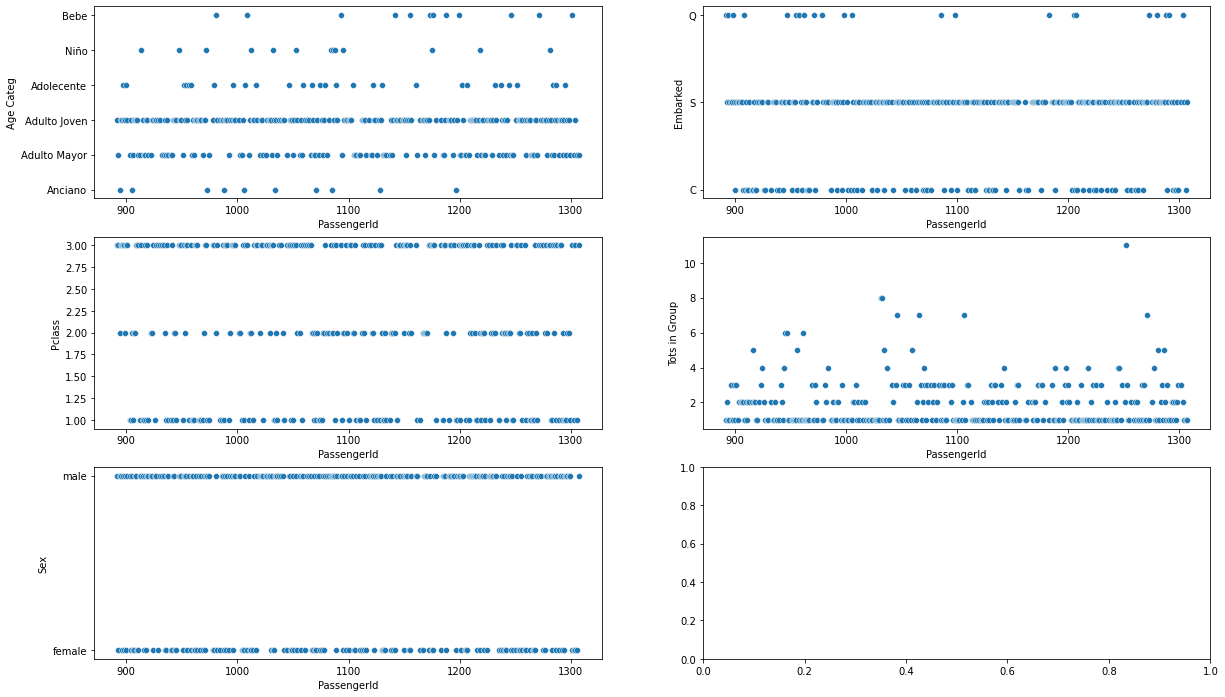

In [30]:
# Figuras con scatter para poder tener una mejor visualización de los datos, por si es que existe
# un outlier. del TEST data
fig, axes = plt.subplots(3, 2, figsize=(20,12))
sns.scatterplot(x='PassengerId', y='Age Categ', data=df_test, ax=axes[0, 0])
sns.scatterplot(x='PassengerId', y='Pclass', data=df_test, ax=axes[1, 0])
sns.scatterplot(x='PassengerId', y='Sex', data=df_test, ax=axes[2, 0])
sns.scatterplot(x='PassengerId', y='Embarked', data=df_test, ax=axes[0, 1])
sns.scatterplot(x='PassengerId', y='Tots in Group', data=df_test, ax=axes[1, 1])

In [31]:
# Aqui vemos que en el caso de "Tots in group" si existe un outlier en comparación con 
# nuetsro train data, por lo que para dejarlos iguales, vamos a eliminarlo.
print(df_test[df_test['Tots in Group'] > 8])
df_test = df_test.drop(index=1252)

             Pclass   Sex Embarked  Tots in Group   Age Categ
PassengerId                                                  
1252              3  male        S             11  Adolecente


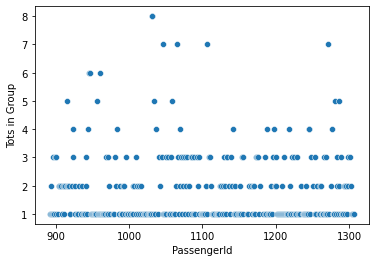

In [32]:
# Cehcamos si se eliminaron
sns.scatterplot(x='PassengerId', y='Tots in Group', data=df_test)

In [33]:
# Ya con el outlier y los datos eliminados, checamos otra vez el head de nuetstros datos
df_test.head()

,Pclass,Sex,Embarked,Tots in Group,Age Categ
PassengerId,,,,,
892,3,male,Q,1,Adulto Joven
893,3,female,S,2,Adulto Mayor
894,2,male,Q,1,Anciano
895,3,male,S,1,Adulto Joven
896,3,female,S,3,Adulto Joven


In [34]:
# Con los datos limpios, podemos convertir todos nuestros datos otra vez en 0 y 1,
# para poder hacerle fit con nuestro modelo de regresion logistica.
df_test = pd.get_dummies(df_test, columns = ["Sex"], drop_first = False)
df_test = pd.get_dummies(df_test, columns = ["Age Categ"], drop_first = False)
df_test = pd.get_dummies(df_test, columns = ["Pclass"], drop_first = False)
df_test = pd.get_dummies(df_test, columns = ["Embarked"], drop_first = False)

# Vemos el nuevo dataframe
df_test.head()

,Tots in Group,Sex_female,Sex_male,Age Categ_Bebe,Age Categ_Niño,Age Categ_Adolecente,Age Categ_Adulto Joven,Age Categ_Adulto Mayor,Age Categ_Anciano,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
892,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0
893,2,1,0,0,0,0,0,1,0,0,0,1,0,0,1
894,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0
895,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1
896,3,1,0,0,0,0,1,0,0,0,0,1,0,0,1


In [35]:
# Checamos los 2 dataframes para ver si son iguales, es decir, imprimimos otra vez el de
# train para checar similitudes
df.head()

,Survived,Tots in Group,Sex_female,Sex_male,Age Categ_Bebe,Age Categ_Niño,Age Categ_Adolecente,Age Categ_Adulto Joven,Age Categ_Adulto Mayor,Age Categ_Anciano,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
1,0,2,0,1,0,0,0,1,0,0,0,0,1,0,0,1
2,1,2,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1
4,1,2,1,0,0,0,0,1,0,0,1,0,0,0,0,1
5,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1


Ya con los 2 dataframes limpios e iguales (solo el de train tiene obvaiemnte la columna de los sobrevivientes, por que con eso se va a entrenar, es decir, ese es nuestro goal) podemos implementar el modelo.

In [36]:
# Importamos lo necesario para el modelo de LogisticRegression de scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

In [37]:
# Definimos variables del modelo con nuesta data
seed = 1800
testp = 0.25

# Nuestra variable objetivo, es decir, lo que buscamos
obj = df['Survived']

# Con esto, eliminamos del train data, esa columna
train_df = df.drop('Survived',axis=1)

# Dividimos nuestro modelo con el data de entrenamiento con difrentes variables
X, X_test, y, y_test = \
train_test_split(train_df, obj, test_size=testp, random_state=seed)

In [38]:
# Iniciamos el modelo de regresion logistica
m = LogisticRegression()

# Ajustamos el modelo con nuestros datos
m.fit(X, y)

# Hacemos predicciones del modelo
pred = m.predict(X_test)

In [39]:
# Podemos saber la presición del modelo comprarando los resultados del modelo, con
# los resultados reales del data set de train.

# Nuestro modelo tiene una accuracy del...
print("Accuracy Score:", round(accuracy_score(y_test, pred)*100, 4), "%")

# Con un F1 score del...
print("F1 Score:", round(f1_score(y_test, pred)*100,4), "%")

Accuracy Score: 82.0225 %
F1 Score: 77.4648 %


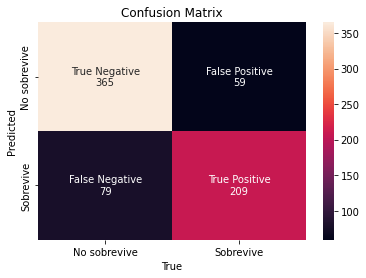

In [40]:
y_pred = cross_val_predict(m, train_df, obj, cv=10)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix(obj, y_pred).flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

s = sns.heatmap(confusion_matrix(obj, y_pred), annot=labels, fmt='', 
                xticklabels=["No sobrevive", "Sobrevive"], yticklabels=["No sobrevive", "Sobrevive"])
s.set_xlabel('True', fontsize=10)
s.set_ylabel('Predicted', fontsize=10)
s.set_title("Confusion Matrix")
plt.show()

Metemos el test DataFrame

In [41]:
# Predecimos con nuestro data de test
pred_test = m.predict(df_test)

# Vemos los resultados
print(pred_test)

[0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1
 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0]


In [42]:
# Contamos la cantidad de "sobrevivientes" y "no sobrevivientes" y lo normalizamos. 
pd.value_counts(pred_test, normalize=True)

0    0.609091
1    0.390909
dtype: float64

En base a los datos de test, vemos que hay un 60% de probabilidad de NO sobrevivir y un 40% de sobrevivir.

Variables con mayor importancia en nuestro modelo

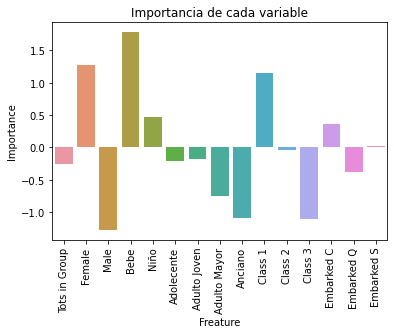

In [43]:
# Obtenemos la importancia 
importance = m.coef_[0]
 
# Hacemos los labels para el gráfico
labels = ["Tots in Group", "Female", "Male", "Bebe", "Niño",\
          "Adolecente", "Adulto Joven", "Adulto Mayor",\
          "Anciano", "Class 1", "Class 2", "Class 3", "Embarked C", "Embarked Q", "Embarked S"]
 
# Hacemos el plot en grafico de barra, para una mejor visualización
ax = sns.barplot(x=[x for x in range(len(importance))], y=importance)
ax.set(xlabel='Freature', ylabel='Importance', title="Importancia de cada variable")
ax.set_xticklabels(labels, rotation=90)
plt.show()

Implementar el modelo para predecir con nuevos datos, es decir, si meto una serie de datos que me diga si esa persona sobrevive o no.

In [44]:
# Trys con personas random para "jugar"
# Definimos a nuestra persona

# Hacemos un dictionary de los datos de nuestra persona y lo convertimos en un dataframe
df_try = pd.DataFrame({
    "Tots in Group":0, 

    "Sex_female":0, "Sex_male":1,

    "Age Categ_Bebe":0, "Age Categ_Niño":0, "Age Categ_Adolecente":0, 
    "Age Categ_Adulto Joven":0, "Age Categ_Adulto Mayor":0, "Age Categ_Anciano":0,

    "Pclass_1":0, "Pclass_2":0, "Pclass_3":0, 

    "Embarked_C":0, "Embarked_Q":0, "Embarked_S":0
}, index=[0])

# Checamos el shape porque necesitamos 15 variables para la regresión
df_try.shape

(1, 15)

In [45]:
# Modelo para predecir con la nueva persona
prediction = m.predict(df_try)

# Condicion de prediccion
if prediction[0] == 0:
    print("No sobrevive")
if prediction[0] == 1:
    print("Sobrevive")

No sobrevive


In [46]:
# Sacamos la probabilidad de la desición
probs = m.predict_proba(df_try)
print("Con una probabilidad de " + "%.4f" % (max(max(probs))))

Con una probabilidad de 0.6250
